# Case Study - Group 11 (S11)

### Group Members
- **Darylle Xander Calugtong**
- **Graham Joshua Ogatia**
- **Joshua Permito**
- **Shem Matthew Salih**

## Dataset Information
Our chosen dataset is the [Valorant Leaderboard Statistics](https://www.kaggle.com/datasets/aliibrahim10/valorant-stats).
This dataset contains [tracker.gg](https://tracker.gg/) statistics with 80,000+ observations and 38 variables
from **Episode 4: Act 3** (April 2022) of the game **Valorant**.
### Important
The observations in the dataset only contain players who are **Immortal** and **Radiant** rank except for a few players
who were demoted at the time of data collection.
Additionally, only those who consent for the platform [tracker.gg](https://tracker.gg) to gather their statistics have their data in the dataset.
### Collection
The platform [tracker.gg](https://tracker.gg/) collects the data from the game **Valorant**.
This site is a third-party platform that tracks the statistics of players in the game.
It is a third-party platform that is not affiliated with the game developers.

## Dataset Structure
Each row represents a player's statistics in the game **Valorant**.
Each column represents a variable that describes the player's statistics.

### Variables
- `region` - The region of the player.
- `name` - The name of the player. (used together with `tag`)
- `tag` - The tag of the player. (used together with `name`)
- `rating` - The rank of the player.
- `damage_round` - The average damage per round of the player in all matches.
- `headshots` - Total number of headshots of the player in all matches.
- `headshot_percent` - Percentage of total hit shots that are headshots of the player in all matches.
- `aces` - Total number of aces of the player in all matches. An ace is when a player kills all 5 players in the enemy team in a single round.
- `clutches` - Total number of clutches of the player in all matches. A clutch is when a player wins a round when they are the last player alive in their team.
- `flawless` - Total number of flawless rounds of the player in all matches. A flawless round is when a team wins a round without any of their players dying.
- `first_bloods` - Total number of first bloods of the player in all matches.
- `kills` - Total number of kills of the player in all matches.
- `deaths` - Total number of deaths of the player in all matches.
- `assists` - Total number of assists of the player in all matches.
- `kd_ratio` - The kill-death ratio of the player in all matches.
- `kills_round` - Average number of kills per round of the player in all matches.
- `most_kills` - Most number of kills in a single match of the player in all matches.
- `score_round` - Average score per round of the player in all matches.
- `wins` - Total number of wins of the player in all matches.
- `win_percent` - Percentage of total matches won of the player in all matches.
- `agent_1` - Most played agent of the player in all matches based on hours.
- `agent_2` - Second most played agent of the player in all matches based on hours.
- `agent_3` - Third most played agent of the player in all matches based on hours.
- `gun1_name` - Player's best gun in all matches based on kills.
- `gun1_head` - Percentage of total hit shots that are headshots of the player using `gun1_name` in all matches.
- `gun1_body` - Percentage of total hit shots that are body shots of the player using `gun1_name` in all matches.
- `gun1_legs` - Percentage of total hit shots that are leg shots of the player using `gun1_name` in all matches.
- `gun1_kills` - Total number of kills of the player using `gun1_name` in all matches.
- `gun2_name` - Player's second-best gun in all matches based on kills.
- `gun2_head` - Percentage of total hit shots that are headshots of the player using `gun2_name` in all matches.
- `gun2_body` - Percentage of total hit shots that are body shots of the player using `gun2_name` in all matches.
- `gun2_legs` - Percentage of total hit shots that are leg shots of the player using `gun2_name` in all matches.
- `gun2_kills` - Total number of kills of the player using `gun2_name` in all matches.
- `gun3_name` - Player's third-best gun in all matches based on kills.
- `gun3_head` - Percentage of total hit shots that are headshots of the player using `gun3_name` in all matches.
- `gun3_body` - Percentage of total hit shots that are body shots of the player using `gun3_name` in all matches.
- `gun3_legs` - Percentage of total hit shots that are leg shots of the player using `gun3_name` in all matches.
- `gun3_kills` - Total number of kills of the player using `gun3_name` in all matches.

## Preprocessing

### Import Libraries
First, we need to import the necessary libraries.

We will be using the following libraries:
- `pandas` - for data manipulation
- `numpy` - for mathematical operations
- `mplcatppuccin` - matplotlib theme (installed as `catppuccin-matplotlib`)
- `matplotlib` - for data visualization

In [3]:
import pandas as pd
import numpy as np
import mplcatppuccin
import matplotlib.style as mplstyle
import matplotlib.pyplot as plt

Set the theme to `mocha` from catppuccin

In [4]:
mplstyle.use('mocha')

### Importing the Dataset

In [5]:
# Only consider blank cells as NA, and thousands to specify the thousands separator
val_df = pd.read_csv('val_stats.csv', thousands=',', keep_default_na=False, na_values=[''],
                     dtype={'region':'category', 'rating':'category'})
val_df

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun2_name,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills
0,NA,ShimmyXD,#NA1,Radiant,135.8,992,24.9,0,140,80,...,Phantom,33,62,5,220,Classic,36,60,3,147
1,NA,XSET Cryo,#cells,Radiant,170.3,879,28.3,2,122,94,...,Operator,8,91,0,226,Phantom,32,63,5,137
2,NA,PuRelittleone,#yoruW,Radiant,147.5,720,24.0,3,117,59,...,Phantom,36,61,3,231,Operator,8,91,1,102
3,NA,Boba,#0068,Radiant,178.2,856,37.3,3,83,49,...,Sheriff,48,51,1,48,Phantom,44,56,0,36
4,NA,i love mina,#kelly,Radiant,149.8,534,24.4,2,71,38,...,Spectre,21,71,8,65,Operator,8,92,0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85673,LAT,Kazutora,#img0d,Radiant,138.2,342,21.4,0,58,54,...,Vandal,28,69,2,175,Classic,39,59,2,71
85674,LAT,el lobo marino,#uthur,Radiant,182.9,650,30.1,4,77,42,...,Vandal,40,57,3,212,Spectre,33,63,5,139
85675,LAT,p9pzet,#666x,Radiant,158.8,613,30.2,0,70,54,...,Phantom,40,56,4,159,Operator,10,89,1,87
85676,LAT,EZ4TGD EnSBuwu,#kmeve,Immortal 3,155.9,132,22.2,0,23,18,...,Phantom,39,57,3,37,Spectre,27,69,4,17


### List of all variables

In [6]:
[col for col in val_df.columns]

['region',
 'name',
 'tag',
 'rating',
 'damage_round',
 'headshots',
 'headshot_percent',
 'aces',
 'clutches',
 'flawless',
 'first_bloods',
 'kills',
 'deaths',
 'assists',
 'kd_ratio',
 'kills_round',
 'most_kills',
 'score_round',
 'wins',
 'win_percent',
 'agent_1',
 'agent_2',
 'agent_3',
 'gun1_name',
 'gun1_head',
 'gun1_body',
 'gun1_legs',
 'gun1_kills',
 'gun2_name',
 'gun2_head',
 'gun2_body',
 'gun2_legs',
 'gun2_kills',
 'gun3_name',
 'gun3_head',
 'gun3_body',
 'gun3_legs',
 'gun3_kills']

## Data Cleaning

### Check for Multiple Representations
Let's proceed to check for multiple representations of values. We will be focusing on categorical variables of `rating`, `region`, `agent_1`, and `gun1_name`.

For the `rating`, let's first list down all the unique values of the variable.

In [7]:
ratings_df = pd.DataFrame(val_df['rating'].unique(), columns=['Rating'])
ratings_df

,Rating
0,Radiant
1,Immortal 3
2,Immortal 2
3,Immortal 1
4,Silver 2
5,Gold 2
6,Diamond 3
7,Gold 1
8,Unrated
9,Platinum 1


Valorant follows the [ranking system](https://support-valorant.riotgames.com/hc/en-us/articles/360047937633-VALORANT-Competitive-Mode-FAQ) of **Iron**, **Bronze**, **Silver**, **Gold**, **Platinum**, **Diamond**, **Ascendant**, **Immortal**, and **Radiant**. Excluding **Radiant**, each rank is divided into three tiers of **1**, **2**, and **3** wherein the higher the number reflects better ranking. Players who do not have a rank are considered **Unrated**. With that in mind, the values of `rating` are considered valid as they are all within the game's ranking system. It could also be observed that there no multiple representations of a rank. 

Now for `region`, `agent_1`, and `gun1_name`, let's check for their representation and validity.

In [8]:
regions_df = pd.DataFrame(val_df['region'].unique(), columns=['Region'])
regions_df

,Region
0,NA
1,EU
2,AP
3,KR
4,BR
5,LAT


In [9]:
agent_1_df = pd.DataFrame(val_df['agent_1'].unique(), columns=['Agent'])
agent_1_df

,Agent
0,Fade
1,Chamber
2,Yoru
3,Jett
4,Sage
5,KAY/O
6,Sova
7,Raze
8,Omen
9,Breach


In [10]:
gun1_name_df = pd.DataFrame(val_df['gun1_name'].unique(), columns=['Gun'])
gun1_name_df

,Gun
0,Vandal
1,Operator
2,Phantom
3,Judge
4,Odin
5,Guardian
6,Spectre
7,Classic
8,Ghost
9,Sheriff


From the results above, we could observe 6 `region`, 19 `agent_1`, and 16 `gun1_name` values with no multiple representation. It is also important to note that the `region` values listed are considered valid [servers](https://support-valorant.riotgames.com/hc/en-us/articles/360055678634-Server-Select) in the game (NA - North America, EU - Europe, AP - Asia Pacific, KR - South Korea, BR - Brazil, LAT - Latin America). Moreover, the listed values for `agent_1` and `gun_1` are valid playable [agents](https://playvalorant.com/en-us/agents/) and [weapons](https://playvalorant.com/en-us/arsenal/) according to Valorant's official website.

### Check for Incorrect Data Type
It is important to check for the data type of each variable since there could be possible representations of numerical values in the dataset as text or string, and vice versa.

In [11]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85678 entries, 0 to 85677
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   region            85678 non-null  category
 1   name              85676 non-null  object  
 2   tag               85358 non-null  object  
 3   rating            85678 non-null  category
 4   damage_round      85678 non-null  float64 
 5   headshots         85678 non-null  int64   
 6   headshot_percent  85678 non-null  float64 
 7   aces              85678 non-null  int64   
 8   clutches          85678 non-null  int64   
 9   flawless          85678 non-null  int64   
 10  first_bloods      85678 non-null  int64   
 11  kills             85678 non-null  int64   
 12  deaths            85678 non-null  int64   
 13  assists           85678 non-null  int64   
 14  kd_ratio          85678 non-null  float64 
 15  kills_round       85678 non-null  float64 
 16  most_kills        8567

Using this general information on the dataset's data types, let's generate a list of variables that should not be represented as numerical values.

In [12]:
val_df.select_dtypes(exclude=['int', 'float']).columns.tolist()

['region',
 'name',
 'tag',
 'rating',
 'agent_1',
 'agent_2',
 'agent_3',
 'gun1_name',
 'gun2_name',
 'gun3_name']

Basing from the variables' names and descriptions, none of these should be represented numerically. Therefore, they are in correct data type.

In [13]:
val_df.select_dtypes(include=['int', 'float']).columns.tolist()

['damage_round',
 'headshots',
 'headshot_percent',
 'aces',
 'clutches',
 'flawless',
 'first_bloods',
 'kills',
 'deaths',
 'assists',
 'kd_ratio',
 'kills_round',
 'most_kills',
 'score_round',
 'wins',
 'win_percent',
 'gun1_head',
 'gun1_body',
 'gun1_legs',
 'gun1_kills',
 'gun2_head',
 'gun2_body',
 'gun2_legs',
 'gun2_kills',
 'gun3_head',
 'gun3_body',
 'gun3_legs',
 'gun3_kills']

According to the variables' names and description, they should be represented numerically. Hence, they are in proper data type.

### Check for Missing Values
Let us check the size of the dataset before cleaning missing values.

In [14]:
val_df.shape

(85678, 38)

There are 85678 rows and 38 columns.

We can now begin checking for missing values.

In [15]:
# Return the raw rows with missing values
missing_df = val_df.isnull().sum()
missing_df[missing_df > 0]

name          2
tag         320
agent_2    1987
agent_3    5217
dtype: int64

There is something suspicious with the `tag` column. There are a lot of "missing values".

In [16]:
null_df = val_df[val_df['tag'].isnull()]
null_df

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun2_name,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills
304,NA,Wilma Caukfit#fk no,NaN,Immortal 3,117.8,372,25.6,0,63,26,...,Vandal,38,59,3,161,Spectre,27,70,3,39
1005,NA,ylang#Luv U,NaN,Immortal 1,136.9,1135,24.2,3,135,92,...,Vandal,40,55,5,397,Spectre,22,71,7,84
1059,NA,pup#ARI G,NaN,Immortal 1,134.1,398,21.6,1,78,43,...,Phantom,31,66,3,161,Ghost,40,55,6,53
1371,NA,jawniss#luv u,NaN,Immortal 1,195.6,56,26.9,0,4,3,...,Operator,0,100,0,14,Spectre,14,86,0,4
1581,NA,LFT Comfy#NA 1,NaN,Immortal 1,136.8,273,17.9,0,47,27,...,Phantom,22,73,4,108,Classic,26,71,3,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83617,LAT,RVN FroxeKzz#EZ GG,NaN,Immortal 1,143.6,874,21.4,1,110,72,...,Vandal,30,64,6,300,Spectre,24,71,5,148
83630,LAT,TriggeR#One T,NaN,Immortal 1,146.5,381,15.6,1,65,35,...,Vandal,26,68,5,199,Spectre,11,76,13,122
84040,LAT,Maniex#on ig,NaN,Immortal 2,148.5,731,24.9,0,91,61,...,Phantom,28,67,6,211,Spectre,26,68,6,86
84289,LAT,keii#on ig,NaN,Immortal 2,164.3,685,25.1,6,74,68,...,Phantom,27,68,5,132,Ghost,32,65,3,58


It looks like the tag was appended to the name. We will fix this by splitting the `name` column into two columns.

In [17]:
# Split the name column into two columns
null_df = null_df['name'].str.split('#', expand=True)
null_df = null_df.rename(columns={0:'name', 1:'tag'})
null_df.loc[:, 'tag'] = '#' + null_df['tag']
null_df

,name,tag
304,Wilma Caukfit,#fk no
1005,ylang,#Luv U
1059,pup,#ARI G
1371,jawniss,#luv u
1581,LFT Comfy,#NA 1
...,...,...
83617,RVN FroxeKzz,#EZ GG
83630,TriggeR,#One T
84040,Maniex,#on ig
84289,keii,#on ig


Now it looks like the `tag` column is fixed. We will replace the `tag` column in the original dataframe with the fixed `tag` column.

In [18]:
# Replace the name and tag column in the original dataframe with the fixed tag column
val_df.loc[val_df['tag'].isnull(), ['name', 'tag']] = null_df
val_df

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun2_name,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills
0,NA,ShimmyXD,#NA1,Radiant,135.8,992,24.9,0,140,80,...,Phantom,33,62,5,220,Classic,36,60,3,147
1,NA,XSET Cryo,#cells,Radiant,170.3,879,28.3,2,122,94,...,Operator,8,91,0,226,Phantom,32,63,5,137
2,NA,PuRelittleone,#yoruW,Radiant,147.5,720,24.0,3,117,59,...,Phantom,36,61,3,231,Operator,8,91,1,102
3,NA,Boba,#0068,Radiant,178.2,856,37.3,3,83,49,...,Sheriff,48,51,1,48,Phantom,44,56,0,36
4,NA,i love mina,#kelly,Radiant,149.8,534,24.4,2,71,38,...,Spectre,21,71,8,65,Operator,8,92,0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85673,LAT,Kazutora,#img0d,Radiant,138.2,342,21.4,0,58,54,...,Vandal,28,69,2,175,Classic,39,59,2,71
85674,LAT,el lobo marino,#uthur,Radiant,182.9,650,30.1,4,77,42,...,Vandal,40,57,3,212,Spectre,33,63,5,139
85675,LAT,p9pzet,#666x,Radiant,158.8,613,30.2,0,70,54,...,Phantom,40,56,4,159,Operator,10,89,1,87
85676,LAT,EZ4TGD EnSBuwu,#kmeve,Immortal 3,155.9,132,22.2,0,23,18,...,Phantom,39,57,3,37,Spectre,27,69,4,17


Let's check again for missing values.

In [19]:
missing_df = val_df.isnull().sum()
missing_df[missing_df > 0]

name          2
tag           2
agent_2    1987
agent_3    5217
dtype: int64

There are still missing values in `name` and `tag`. Let's check the rows with missing values.

First, we will check the rows with missing values in `name`.

In [20]:
null_df = val_df[val_df['name'].isnull()]
null_df

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun2_name,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills
24453,EU,NaN,NaN,Immortal 1,152.2,17,22.5,0,4,1,...,Ghost,60,20,20,3,Spectre,8,85,8,3
63603,AP,NaN,NaN,Gold 3,115.7,257,18.2,0,52,28,...,Classic,39,58,3,47,Phantom,24,68,8,39


There is at least one row with a missing `name` and `tag`.
We will fill the missing names with the value "(No Name)" and the missing tags with a string with format `#n` where n is the index of the row.

In [21]:
# Iterate through the rows and fill the missing names and tags
for i, row in null_df.iterrows():
    val_df.loc[i, 'name'] = f'(No Name)'
    val_df.loc[i, 'tag'] = f'#{i}'
val_df

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun2_name,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills
0,NA,ShimmyXD,#NA1,Radiant,135.8,992,24.9,0,140,80,...,Phantom,33,62,5,220,Classic,36,60,3,147
1,NA,XSET Cryo,#cells,Radiant,170.3,879,28.3,2,122,94,...,Operator,8,91,0,226,Phantom,32,63,5,137
2,NA,PuRelittleone,#yoruW,Radiant,147.5,720,24.0,3,117,59,...,Phantom,36,61,3,231,Operator,8,91,1,102
3,NA,Boba,#0068,Radiant,178.2,856,37.3,3,83,49,...,Sheriff,48,51,1,48,Phantom,44,56,0,36
4,NA,i love mina,#kelly,Radiant,149.8,534,24.4,2,71,38,...,Spectre,21,71,8,65,Operator,8,92,0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85673,LAT,Kazutora,#img0d,Radiant,138.2,342,21.4,0,58,54,...,Vandal,28,69,2,175,Classic,39,59,2,71
85674,LAT,el lobo marino,#uthur,Radiant,182.9,650,30.1,4,77,42,...,Vandal,40,57,3,212,Spectre,33,63,5,139
85675,LAT,p9pzet,#666x,Radiant,158.8,613,30.2,0,70,54,...,Phantom,40,56,4,159,Operator,10,89,1,87
85676,LAT,EZ4TGD EnSBuwu,#kmeve,Immortal 3,155.9,132,22.2,0,23,18,...,Phantom,39,57,3,37,Spectre,27,69,4,17


Let's check again for missing values.

In [22]:
missing_df = val_df.isnull().sum()
missing_df[missing_df > 0]

agent_2    1987
agent_3    5217
dtype: int64

Looks like that's it! The current missing values are in the `agent_2` and `agent_3` columns.
These are acceptable because they may be players who only played one agent.

After cleaning the missing values, let's check the size of the dataset again.

In [23]:
val_df.shape

(85678, 38)

There are 85678 rows and 38 columns.

Here is the cleaned dataset.

In [24]:
val_df

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun2_name,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills
0,NA,ShimmyXD,#NA1,Radiant,135.8,992,24.9,0,140,80,...,Phantom,33,62,5,220,Classic,36,60,3,147
1,NA,XSET Cryo,#cells,Radiant,170.3,879,28.3,2,122,94,...,Operator,8,91,0,226,Phantom,32,63,5,137
2,NA,PuRelittleone,#yoruW,Radiant,147.5,720,24.0,3,117,59,...,Phantom,36,61,3,231,Operator,8,91,1,102
3,NA,Boba,#0068,Radiant,178.2,856,37.3,3,83,49,...,Sheriff,48,51,1,48,Phantom,44,56,0,36
4,NA,i love mina,#kelly,Radiant,149.8,534,24.4,2,71,38,...,Spectre,21,71,8,65,Operator,8,92,0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85673,LAT,Kazutora,#img0d,Radiant,138.2,342,21.4,0,58,54,...,Vandal,28,69,2,175,Classic,39,59,2,71
85674,LAT,el lobo marino,#uthur,Radiant,182.9,650,30.1,4,77,42,...,Vandal,40,57,3,212,Spectre,33,63,5,139
85675,LAT,p9pzet,#666x,Radiant,158.8,613,30.2,0,70,54,...,Phantom,40,56,4,159,Operator,10,89,1,87
85676,LAT,EZ4TGD EnSBuwu,#kmeve,Immortal 3,155.9,132,22.2,0,23,18,...,Phantom,39,57,3,37,Spectre,27,69,4,17


### Remove Duplicate Rows
Let us check for duplicate rows.

In [25]:
val_df[val_df.duplicated()]

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun2_name,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills
327,NA,WRE Px,#1TAP,Immortal 3,133.8,368,38.0,1,52,17,...,Vandal,50,48,3,141,Spectre,39,58,4,55
471,NA,mer,#goat,Immortal 2,148.9,295,26.6,0,29,20,...,Phantom,40,57,3,90,Spectre,29,68,3,44
1828,NA,Misssso,#NA1,Immortal 1,149.9,512,17.3,1,75,48,...,Vandal,29,66,4,260,Spectre,19,73,8,77
1839,NA,OnionBean,#NA1,Immortal 1,136.6,450,19.3,1,56,36,...,Classic,28,67,5,79,Spectre,19,72,9,56
2034,NA,OryxTheMadHatter,#NA1,Immortal 1,152.4,1120,21.5,2,151,88,...,Phantom,30,64,6,388,Spectre,20,70,10,137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83999,LAT,fraZ,#PENA,Immortal 1,157.2,395,25.8,0,51,20,...,Phantom,31,66,3,60,Ghost,37,59,4,45
84062,LAT,crip,#2858,Immortal 2,140.7,180,28.5,0,21,14,...,Phantom,34,64,3,68,Ghost,29,66,6,15
84064,LAT,Nicobass1,#LAN,Immortal 2,207.9,105,18.2,0,15,4,...,Spectre,12,78,10,25,Ghost,63,31,6,10
84541,LAT,sshinko,#huh,Immortal 2,135.7,324,20.5,2,58,33,...,Phantom,28,66,6,161,Spectre,17,77,6,53


We will remove duplicate rows based on the `name` and `tag` columns. These columns are used to identify a player.
Then, we will keep the first row of the duplicate rows.

In [26]:
# Use loc indexer to avoid SettingWithCopyWarning
val_df = val_df.loc[~val_df.duplicated(subset=['name', 'tag'], keep='first')]
val_df

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun2_name,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills
0,NA,ShimmyXD,#NA1,Radiant,135.8,992,24.9,0,140,80,...,Phantom,33,62,5,220,Classic,36,60,3,147
1,NA,XSET Cryo,#cells,Radiant,170.3,879,28.3,2,122,94,...,Operator,8,91,0,226,Phantom,32,63,5,137
2,NA,PuRelittleone,#yoruW,Radiant,147.5,720,24.0,3,117,59,...,Phantom,36,61,3,231,Operator,8,91,1,102
3,NA,Boba,#0068,Radiant,178.2,856,37.3,3,83,49,...,Sheriff,48,51,1,48,Phantom,44,56,0,36
4,NA,i love mina,#kelly,Radiant,149.8,534,24.4,2,71,38,...,Spectre,21,71,8,65,Operator,8,92,0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85673,LAT,Kazutora,#img0d,Radiant,138.2,342,21.4,0,58,54,...,Vandal,28,69,2,175,Classic,39,59,2,71
85674,LAT,el lobo marino,#uthur,Radiant,182.9,650,30.1,4,77,42,...,Vandal,40,57,3,212,Spectre,33,63,5,139
85675,LAT,p9pzet,#666x,Radiant,158.8,613,30.2,0,70,54,...,Phantom,40,56,4,159,Operator,10,89,1,87
85676,LAT,EZ4TGD EnSBuwu,#kmeve,Immortal 3,155.9,132,22.2,0,23,18,...,Phantom,39,57,3,37,Spectre,27,69,4,17


Let's check for duplicate rows again.

In [27]:
val_df[val_df.duplicated()]

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun2_name,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills


There are no more duplicate rows.

After removing duplicate rows, let's check the size of the dataset again.

In [28]:
val_df.shape

(84068, 38)

In [29]:
def check_nan_or_non_integer(column):
    numeric_column = pd.to_numeric(column, errors='coerce')
    has_non_integer_values = numeric_column.isna().any()
    return has_non_integer_values

columns_to_check = ['damage_round', 'headshots', 'headshot_percent', 'aces', 'clutches', 'flawless', 'first_bloods', 'kills', 'deaths', 'assists', 'kd_ratio', 'kills_round', 'most_kills', 'kills', 'score_round', 'wins', 'gun1_head', 'gun1_body', 'gun1_legs', 'gun1_kills', 'gun2_head', 'gun2_body', 'gun2_legs', 'gun2_kills', 'gun3_head', 'gun3_body', 'gun3_legs', 'gun3_kills']

for column in columns_to_check:
    result = check_nan_or_non_integer(val_df[column])
    print("Has non integer values " + f"{column}: {result}")


Has non integer values damage_round: False
Has non integer values headshots: False
Has non integer values headshot_percent: False
Has non integer values aces: False
Has non integer values clutches: False
Has non integer values flawless: False
Has non integer values first_bloods: False
Has non integer values kills: False
Has non integer values deaths: False
Has non integer values assists: False
Has non integer values kd_ratio: False
Has non integer values kills_round: False
Has non integer values most_kills: False
Has non integer values kills: False
Has non integer values score_round: False
Has non integer values wins: False
Has non integer values gun1_head: False
Has non integer values gun1_body: False
Has non integer values gun1_legs: False
Has non integer values gun1_kills: False
Has non integer values gun2_head: False
Has non integer values gun2_body: False
Has non integer values gun2_legs: False
Has non integer values gun2_kills: False
Has non integer values gun3_head: False
Has no

In [30]:
print(val_df['rating'].unique().tolist())
print(val_df['agent_1'].unique().tolist())
print(val_df['agent_2'].unique().tolist())
print(val_df['agent_3'].unique().tolist())
print(val_df['gun1_name'].unique().tolist())
print(val_df['gun2_name'].unique().tolist())
print(val_df['gun3_name'].unique().tolist())


['Radiant', 'Immortal 3', 'Immortal 2', 'Immortal 1', 'Silver 2', 'Gold 2', 'Diamond 3', 'Gold 1', 'Unrated', 'Platinum 1', 'Bronze 3', 'Gold 3', 'Bronze 2', 'Diamond 2', 'Silver 3', 'Silver 1', 'Platinum 2', 'Diamond 1', 'Platinum 3']
['Fade', 'Chamber', 'Yoru', 'Jett', 'Sage', 'KAY/O', 'Sova', 'Raze', 'Omen', 'Breach', 'Reyna', 'Neon', 'Skye', 'Viper', 'Brimstone', 'Phoenix', 'Astra', 'Killjoy', 'Cypher']
['Viper', 'Jett', 'Chamber', 'Raze', 'Sova', 'Fade', 'Reyna', 'Skye', 'Omen', 'Neon', 'KAY/O', 'Brimstone', nan, 'Sage', 'Cypher', 'Astra', 'Killjoy', 'Breach', 'Yoru', 'Phoenix']
['Omen', 'Raze', 'Chamber', 'KAY/O', 'Sova', 'Sage', 'Jett', 'Reyna', 'Viper', 'Neon', 'Fade', nan, 'Skye', 'Brimstone', 'Breach', 'Killjoy', 'Cypher', 'Astra', 'Yoru', 'Phoenix']
['Vandal', 'Operator', 'Phantom', 'Judge', 'Odin', 'Guardian', 'Spectre', 'Classic', 'Ghost', 'Sheriff', 'Marshal', 'Shorty', 'Bulldog', 'Ares', 'Frenzy', 'Bucky']
['Phantom', 'Operator', 'Sheriff', 'Spectre', 'Vandal', 'Classic'

## Exploratory Data Analysis

### Region Distribution

In [82]:
region_count = val_df['region'].value_counts()
region_count

region
EU     31901
NA     20766
AP     18950
BR      6920
LAT     3267
KR      2264
Name: count, dtype: int64

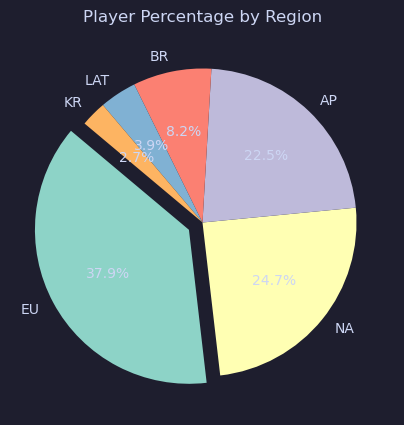

In [137]:
colormap = plt.cm.Set3
explode = (0.1, 0, 0, 0, 0, 0)

plt.figure(figsize=(5, 5)) 
plt.pie(region_count, labels=region_count.index, autopct='%1.1f%%', startangle=140, colors=colormap.colors, explode=explode)
plt.title('Player Percentage by Region') 

plt.show()

### Who is the most played agent?

In [31]:
agent_count_df = val_df['agent_1'].value_counts()
agent_count_df

agent_1
Chamber      19168
Jett         11729
Reyna        10992
Raze          5907
Omen          5809
Sova          5715
Fade          5309
Sage          5051
Viper         3496
Brimstone     3356
KAY/O         1920
Skye          1742
Neon          1063
Killjoy        615
Breach         586
Yoru           566
Cypher         459
Astra          451
Phoenix        134
Name: count, dtype: int64

Text(0.5, 1.0, 'Player count per agent')

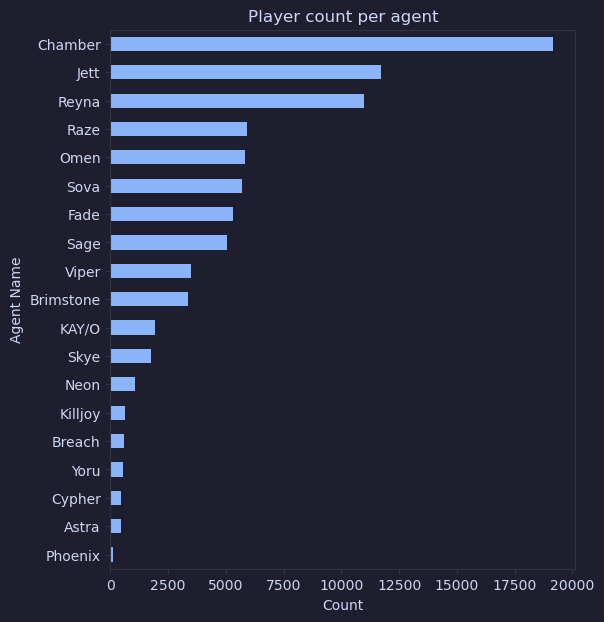

In [121]:
agent_count_df.plot.barh(figsize=(6,7)).invert_yaxis()
plt.xlabel('Count')
plt.ylabel('Agent Name')
plt.title('Player count per agent')

## Most Used Gun


In [33]:
gun_count_df = val_df['gun1_name'].value_counts()
gun_count_df

gun1_name
Vandal      72452
Phantom     10930
Operator      407
Judge          85
Odin           62
Spectre        45
Sheriff        24
Guardian       18
Ghost          16
Classic         8
Frenzy          7
Marshal         3
Shorty          3
Bulldog         3
Ares            3
Bucky           2
Name: count, dtype: int64

Text(0.5, 1.0, 'Gun count per player')

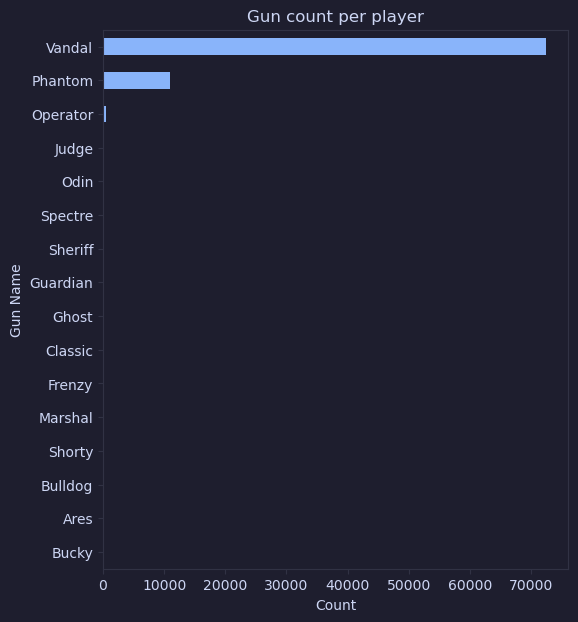

In [34]:
gun_count_df.plot.barh(figsize=(6,7)).invert_yaxis()
plt.xlabel('Count')
plt.ylabel('Gun Name')
plt.title('Gun count per player')

Since, vandal skewed the data -- apply log transformation

In [36]:
log_gun_count = np.log(gun_count_df)
log_gun_count

gun1_name
Vandal      11.190680
Phantom      9.299267
Operator     6.008813
Judge        4.442651
Odin         4.127134
Spectre      3.806662
Sheriff      3.178054
Guardian     2.890372
Ghost        2.772589
Classic      2.079442
Frenzy       1.945910
Marshal      1.098612
Shorty       1.098612
Bulldog      1.098612
Ares         1.098612
Bucky        0.693147
Name: count, dtype: float64

Text(0.5, 1.0, 'Gun count per player')

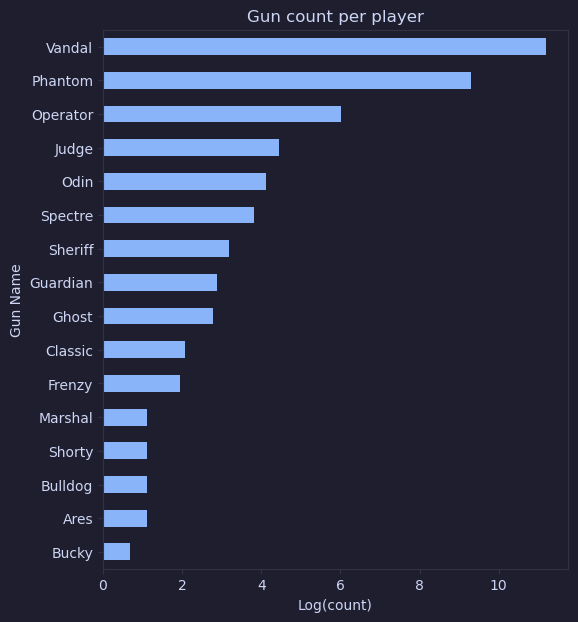

In [46]:
log_gun_count.plot.barh(figsize=(6,7)).invert_yaxis()
plt.xlabel('Log(count)')
plt.ylabel('Gun Name')
plt.title('Gun count per player')

### Damage Round

In [122]:
agg = val_df.agg({"damage_round": ["mean", "median", "std"]})

mean = agg.loc["mean"][0]
median = agg.loc["median"][0]
std = agg.loc["std"][0]

print('Mean: {:.2f}'.format(mean))
print('Median: {:.2f}'.format(median))
print('Standard Deviation: {:.2f}'.format(std))

Mean: 142.83
Median: 142.00
Standard Deviation: 16.48


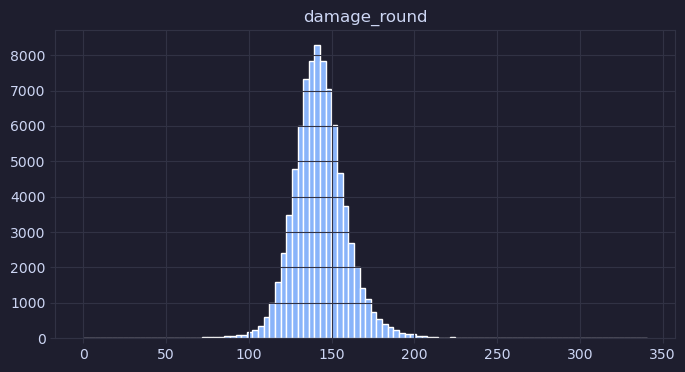

In [123]:
val_df.hist("damage_round", bins=100, edgecolor='w', figsize=(8, 4))
plt.show()

### Headshot Percentage

In [131]:
agg = val_df.agg({"headshot_percent": ["mean", "median", "std"]})

mean = agg.loc["mean"][0]
median = agg.loc["median"][0]
std = agg.loc["std"][0]

print('Mean: {:.2f}'.format(mean))
print('Median: {:.2f}'.format(median))
print('Standard Deviation: {:.2f}'.format(std))

Mean: 23.60
Median: 23.30
Standard Deviation: 5.19


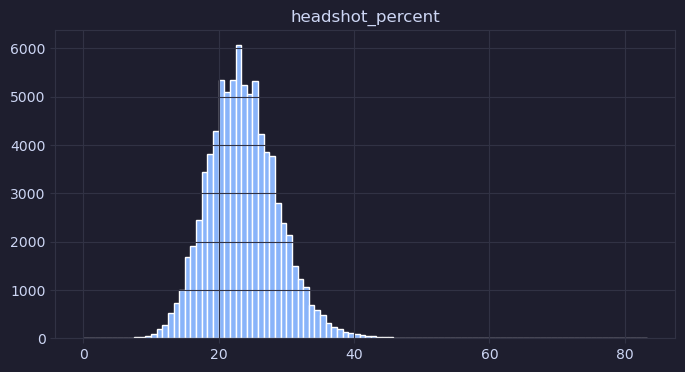

In [125]:
val_df.hist("headshot_percent", bins=100, edgecolor='w', figsize=(8, 4))
plt.show()

### Kill-Death Ratio

In [132]:
agg = val_df.agg({"kd_ratio": ["mean", "median", "std"]})

mean = agg.loc["mean"][0]
median = agg.loc["median"][0]
std = agg.loc["std"][0]

print('Mean: {:.2f}'.format(mean))
print('Median: {:.2f}'.format(median))
print('Standard Deviation: {:.2f}'.format(std))

Mean: 1.05
Median: 1.04
Standard Deviation: 0.16


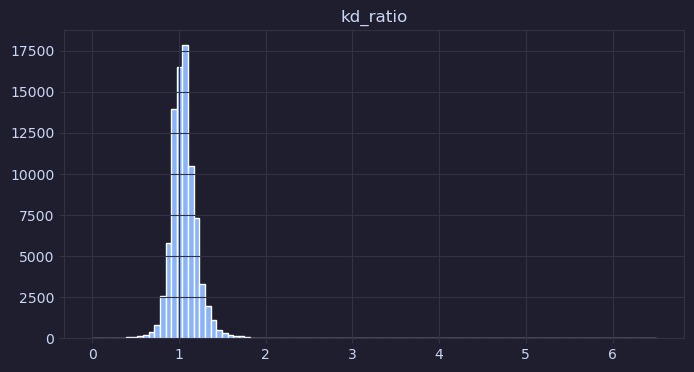

In [133]:
val_df.hist("kd_ratio", bins=100, edgecolor='w', figsize=(8, 4))
plt.show()

### Win Percentage

In [135]:
agg = val_df.agg({"win_percent": ["mean", "median", "std"]})

mean = agg.loc["mean"][0]
median = agg.loc["median"][0]
std = agg.loc["std"][0]

print('Mean: {:.2f}'.format(mean))
print('Median: {:.2f}'.format(median))
print('Standard Deviation: {:.2f}'.format(std))

Mean: 53.89
Median: 52.90
Standard Deviation: 11.38


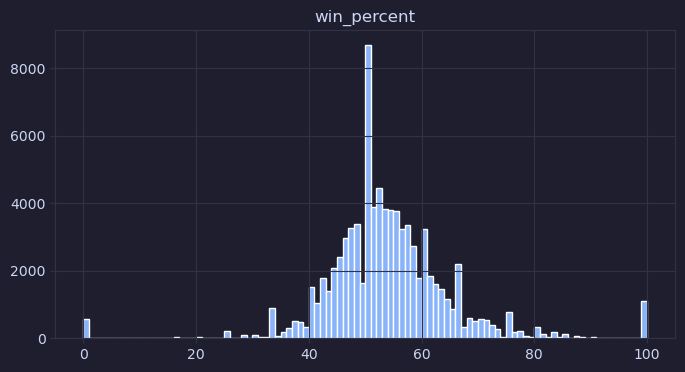

In [136]:
val_df.hist("win_percent", bins=100, edgecolor='w', figsize=(8, 4))
plt.show()